# Learning from Pre-Built Models
#Author: Devisha Arunadevi Tiwari

In [4]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

# Step 1: Utilize VGG16 for Feature Extraction
# Objective: Employ the VGG16 model, excluding its top layers, to serve as a feature extractor for cat and dog images.
# Method: Use the VGG16 model pre-trained on ImageNet, exclude the top layers (fully connected layers).
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Step 2: Ensure the input images are of the correct size (150x150) and preprocessed appropriately to match VGG16’s requirements.
# Objective: Ensure input images are of the correct size (150x150) and preprocessed appropriately.
# Method: Preprocess input images using the VGG16 preprocessing function.
from tensorflow.keras.applications.vgg16 import preprocess_input

# Step 3: Data Preprocessing and Augmentation
# Objective: Implement image data generators for real-time data augmentation, ensuring a robust and varied dataset for training.
# Method: Use ImageDataGenerator for real-time augmentation during training and validation.
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to the range [0, 1]
    shear_range=0.2,  # Apply shear transformations
    zoom_range=0.2,  # Apply zoom transformations
    horizontal_flip=True,  # Flip images horizontally
    preprocessing_function=preprocess_input  # Apply VGG16-specific preprocessing
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to the range [0, 1]
    preprocessing_function=preprocess_input  # Apply VGG16-specific preprocessing
)

# Step 4: Build the Classification Model
# Objective: Add custom fully connected layers on top of the VGG16 model for the classification task.
# Method: Use VGG16's convolutional layers for feature extraction, and add custom fully connected layers for classification.
model = Sequential()

# Add the pre-trained VGG16 base model (without the top layers)
model.add(base_model)

# Freeze the VGG16 base layers (do not train them)
base_model.trainable = False

# Add a Flatten layer to convert the output from the convolutional layers to a 1D vector
model.add(Flatten())

# Add a custom fully connected (dense) layer with 256 units
model.add(Dense(256, activation='relu'))

# Add another fully connected layer with 128 units
model.add(Dense(128, activation='relu'))

# Output layer with 2 units (for Cat and Dog classification) and softmax activation
model.add(Dense(2, activation='softmax'))

# Step 5: Compile the Model
# Objective: Compile the model using stochastic gradient descent, categorical cross-entropy as the loss function, and accuracy as the evaluation metric.
# Method: Use the SGD optimizer and categorical cross-entropy loss function for training.
model.compile(optimizer=SGD(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 6: Train the Model
# Objective: Train the model using the training data, and validate its performance using a validation set.
# Method: Use the ImageDataGenerator for both training and validation data, and train the model using the fit method.
# Directory paths for the train and validation datasets
train_dir = r'C:\Users\91983\OneDrive\Documents\archive\cats_and_dogs_filtered\train'  # Replace with the actual path to the training dataset
val_dir = r'C:\Users\91983\OneDrive\Documents\archive\cats_and_dogs_filtered\validation'  # Replace with the actual path to the validation dataset

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical'
)

# Train the model with early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

# Step 7: Evaluate and Test the Model
# Objective: Assess the model’s performance based on its accuracy in classifying images into cat or dog categories.
# Method: Evaluate the model on a test set to assess performance.
test_dir = r'C:\Users\91983\OneDrive\Documents\archive\cats_and_dogs_filtered\test'   # Replace with the actual path to the test dataset

# Use the same preprocessing function for test data
test_generator = validation_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical'
)

# Evaluate the model's performance on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# Step 8: Implement a prediction function to classify new images.
# Objective: Implement a prediction function to classify new images and provide predicted categories with confidence levels.
# Method: Create a function to predict the class of an image and output the class and its associated confidence level.
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    """Predict the category of a single image (cat or dog)."""
    img = image.load_img(img_path, target_size=(150, 150))  # Load the image with target size
    img_array = image.img_to_array(img)  # Convert the image to a numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add an extra dimension for the batch size
    img_array = preprocess_input(img_array)  # Preprocess the image for VGG16

    # Get the prediction probabilities
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)  # Get the class with the highest probability
    confidence = prediction[0][predicted_class]  # Get the confidence level for the predicted class
    
    # Map the prediction to a human-readable label
    class_names = ['Cat', 'Dog']
    print(f"Predicted Class: {class_names[predicted_class]}, Confidence: {confidence:.2f}")

# Example: Predict an image (replace with an actual image path)
predict_image(r'C:\Users\91983\OneDrive\Documents\archive\cats_and_dogs_filtered\validation\cat\Abyssinian_155_jpg.rf.fdd90a163673ab77ec9690317a69b94e.jpg')


Found 260 images belonging to 2 classes.
Found 63 images belonging to 2 classes.
Epoch 1/10
17/17 [==============================] - 52s 3s/step - loss: 0.7633 - accuracy: 0.4346 - val_loss: 0.7120 - val_accuracy: 0.4603
Epoch 2/10
17/17 [==============================] - 45s 3s/step - loss: 0.6987 - accuracy: 0.5462 - val_loss: 0.6844 - val_accuracy: 0.5714
Epoch 3/10
17/17 [==============================] - 45s 3s/step - loss: 0.6710 - accuracy: 0.6231 - val_loss: 0.6725 - val_accuracy: 0.6032
Epoch 4/10
17/17 [==============================] - 45s 3s/step - loss: 0.6770 - accuracy: 0.6269 - val_loss: 0.6636 - val_accuracy: 0.6032
Epoch 5/10
17/17 [==============================] - 44s 3s/step - loss: 0.6565 - accuracy: 0.6462 - val_loss: 0.6551 - val_accuracy: 0.6190
Epoch 6/10
17/17 [==============================] - 44s 3s/step - loss: 0.6421 - accuracy: 0.6577 - val_loss: 0.6489 - val_accuracy: 0.6190
Epoch 7/10
17/17 [==============================] - 44s 3s/step - loss: 0.6489 

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 1: Preprocess the data
# Objective: Organize the images into train, validation, and test sets.

# Set paths to the data directories
train_dir = r'C:\Users\91983\OneDrive\Documents\archive\cats_and_dogs_filtered\train'
validation_dir = r'C:\Users\91983\OneDrive\Documents\archive\cats_and_dogs_filtered\validation'
test_dir = r'C:\Users\91983\OneDrive\Documents\archive\cats_and_dogs_filtered\test'

# Set up ImageDataGenerator for data augmentation and rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize the pixel values to be between 0 and 1
    rotation_range=40,  # Randomly rotate images
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.2,  # Shear images randomly
    zoom_range=0.2,  # Randomly zoom in/out of images
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Fill empty pixels after transformations
)

validation_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale validation data

# Set up data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize all images to 150x150
    batch_size=32,
    class_mode='categorical'  # Use 'categorical' for multi-class classification (one-hot encoding)
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'  # Same here for validation
)

# Step 2: Build the model
# Objective: Create a Convolutional Neural Network (CNN) to classify cats and dogs.

model = models.Sequential([
    # First convolutional layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    
    # Second convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    # Third convolutional layer
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    # Flatten the data before feeding it to a fully connected layer
    layers.Flatten(),
    
    # Dense layer with 512 neurons
    layers.Dense(512, activation='relu'),
    
    # Output layer with 2 neurons for 'cat' and 'dog' (2 classes)
    layers.Dense(2, activation='softmax')  # Softmax activation for multi-class classification
])

# Step 3: Compile the model
# Objective: Set up the optimizer, loss function, and evaluation metric.

model.compile(
    optimizer='adam',  # Use the Adam optimizer
    loss='categorical_crossentropy',  # Categorical cross-entropy loss for multi-class classification
    metrics=['accuracy']  # Track accuracy as the performance metric
)

# Step 4: Train the model
# Objective: Train the model using the training data with early stopping.

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=10,  # Set the number of epochs
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

# Step 5: Evaluate the model
# Objective: Assess the model’s performance based on its accuracy on the test set.

# Test the model on the test data
test_datagen = ImageDataGenerator(rescale=1./255)  # Rescale the test data

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'  # Ensure categorical labels for test data
)

test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc:.2f}")


Found 260 images belonging to 2 classes.
Found 63 images belonging to 2 classes.
Epoch 1/10
9/9 [==============================] - 17s 2s/step - loss: 1.2700 - accuracy: 0.4962 - val_loss: 0.7128 - val_accuracy: 0.6190
Epoch 2/10
9/9 [==============================] - 13s 1s/step - loss: 0.6814 - accuracy: 0.6192 - val_loss: 0.6668 - val_accuracy: 0.6190
Epoch 3/10
9/9 [==============================] - 13s 1s/step - loss: 0.6679 - accuracy: 0.6346 - val_loss: 0.6599 - val_accuracy: 0.6190
Epoch 4/10
9/9 [==============================] - 13s 1s/step - loss: 0.6564 - accuracy: 0.6346 - val_loss: 0.6634 - val_accuracy: 0.6190
Epoch 5/10
9/9 [==============================] - 13s 1s/step - loss: 0.6599 - accuracy: 0.6346 - val_loss: 0.6547 - val_accuracy: 0.6190
Epoch 6/10
9/9 [==============================] - 13s 2s/step - loss: 0.6404 - accuracy: 0.6346 - val_loss: 0.6728 - val_accuracy: 0.6190
Epoch 7/10
9/9 [==============================] - 13s 1s/step - loss: 0.6320 - accuracy: 0.

In [1]:
# Import necessary libraries
import tensorflow as tf
import numpy as np  # Ensure numpy is imported
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

# Step 1: Utilize VGG16 for Feature Extraction
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Step 2: Preprocessing the images to match VGG16 requirements
from tensorflow.keras.applications.vgg16 import preprocess_input

# Step 3: Data Preprocessing and Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to the range [0, 1]
    shear_range=0.2,  # Apply shear transformations
    zoom_range=0.2,  # Apply zoom transformations
    horizontal_flip=True,  # Flip images horizontally
    preprocessing_function=preprocess_input  # Apply VGG16-specific preprocessing
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to the range [0, 1]
    preprocessing_function=preprocess_input  # Apply VGG16-specific preprocessing
)

# Step 4: Build the Classification Model
model = Sequential()

# Add the pre-trained VGG16 base model (without the top layers)
model.add(base_model)

# Freeze the VGG16 base layers (do not train them)
base_model.trainable = False

# Add a Flatten layer to convert the output from the convolutional layers to a 1D vector
model.add(Flatten())

# Add a custom fully connected (dense) layer with 256 units
model.add(Dense(256, activation='relu'))

# Add another fully connected layer with 128 units
model.add(Dense(128, activation='relu'))

# Output layer with 2 units (for Cat and Dog classification) and softmax activation
model.add(Dense(2, activation='softmax'))

# Step 5: Compile the Model
model.compile(optimizer=SGD(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 6: Train the Model
train_dir = r'C:\Users\91983\OneDrive\Documents\archive\cats_and_dogs_filtered\train'  # Replace with the actual path to the training dataset
val_dir = r'C:\Users\91983\OneDrive\Documents\archive\cats_and_dogs_filtered\validation'  # Replace with the actual path to the validation dataset

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical'
)

# Train the model with early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

# Step 7: Evaluate and Test the Model
test_dir = r'C:\Users\91983\OneDrive\Documents\archive\cats_and_dogs_filtered\test'  # Replace with the actual path to the test dataset

test_generator = validation_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical'
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# Step 8: Implement a prediction function to classify new images.
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    """Predict the category of a single image (cat or dog)."""
    img = image.load_img(img_path, target_size=(150, 150))  # Load the image with target size
    img_array = image.img_to_array(img)  # Convert the image to a numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add an extra dimension for the batch size
    img_array = preprocess_input(img_array)  # Preprocess the image for VGG16

    # Get the prediction probabilities
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)  # Get the class with the highest probability
    confidence = prediction[0][predicted_class]  # Get the confidence level for the predicted class
    
    # Map the prediction to a human-readable label
    class_names = ['Cat', 'Dog']
    print(f"Predicted Class: {class_names[predicted_class]}, Confidence: {confidence:.2f}")

# Example: Predict an image (replace with an actual image path)
predict_image(r'C:\Users\91983\OneDrive\Documents\archive\cats_and_dogs_filtered\validation\cat\Abyssinian_155_jpg.rf.fdd90a163673ab77ec9690317a69b94e.jpg')


Found 260 images belonging to 2 classes.
Found 63 images belonging to 2 classes.
Epoch 1/10
17/17 [==============================] - 52s 3s/step - loss: 0.7151 - accuracy: 0.5115 - val_loss: 0.6741 - val_accuracy: 0.5714
Epoch 2/10
17/17 [==============================] - 47s 3s/step - loss: 0.6512 - accuracy: 0.6077 - val_loss: 0.6518 - val_accuracy: 0.5714
Epoch 3/10
17/17 [==============================] - 44s 3s/step - loss: 0.6305 - accuracy: 0.6423 - val_loss: 0.6446 - val_accuracy: 0.5714
Epoch 4/10
17/17 [==============================] - 43s 3s/step - loss: 0.6242 - accuracy: 0.6423 - val_loss: 0.6377 - val_accuracy: 0.5873
Epoch 5/10
17/17 [==============================] - 45s 3s/step - loss: 0.6259 - accuracy: 0.6462 - val_loss: 0.6333 - val_accuracy: 0.5873
Epoch 6/10
17/17 [==============================] - 45s 3s/step - loss: 0.6279 - accuracy: 0.6346 - val_loss: 0.6270 - val_accuracy: 0.5873
Epoch 7/10
17/17 [==============================] - 44s 3s/step - loss: 0.6128 

Found 260 images belonging to 2 classes.
Found 63 images belonging to 2 classes.
Epoch 1/10
9/9 [==============================] - 17s 2s/step - loss: 0.8538 - accuracy: 0.5192 - val_loss: 0.6846 - val_accuracy: 0.6190
Epoch 2/10
9/9 [==============================] - 13s 2s/step - loss: 0.6488 - accuracy: 0.6346 - val_loss: 0.6453 - val_accuracy: 0.6190
Epoch 3/10
9/9 [==============================] - 14s 2s/step - loss: 0.6336 - accuracy: 0.6346 - val_loss: 0.6748 - val_accuracy: 0.6190
Epoch 4/10
9/9 [==============================] - 14s 2s/step - loss: 0.6427 - accuracy: 0.6538 - val_loss: 0.7383 - val_accuracy: 0.6190
Epoch 5/10
9/9 [==============================] - 13s 2s/step - loss: 0.6186 - accuracy: 0.6346 - val_loss: 0.6931 - val_accuracy: 0.6190
Found 9 images belonging to 2 classes.
1/1 [==============================] - 0s 231ms/step - loss: 0.6291 - accuracy: 0.5556
Test accuracy: 0.56
1/1 [==============================] - 0s 344ms/step


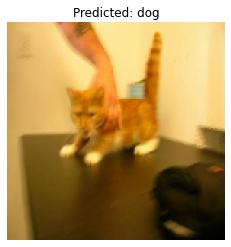

1/1 [==============================] - 0s 61ms/step


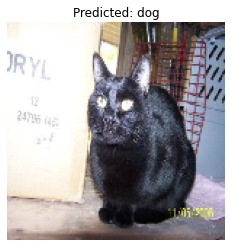

1/1 [==============================] - 0s 63ms/step


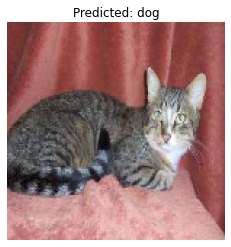

1/1 [==============================] - 0s 61ms/step


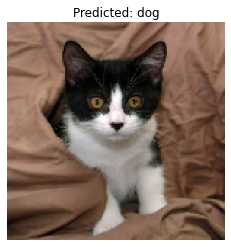

1/1 [==============================] - 0s 60ms/step


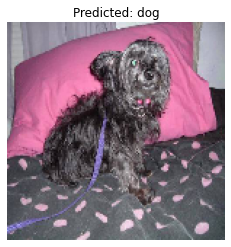

1/1 [==============================] - 0s 60ms/step


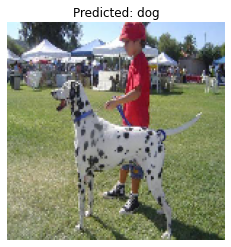

1/1 [==============================] - 0s 57ms/step


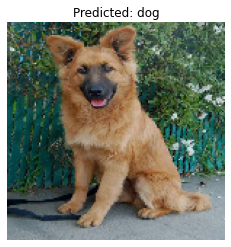

1/1 [==============================] - 0s 58ms/step


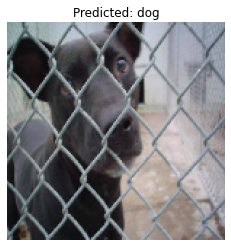

1/1 [==============================] - 0s 64ms/step


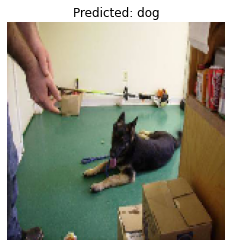

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, models

# Step 1: Preprocess the data (as previously done)
train_dir = r'C:\Users\91983\OneDrive\Documents\archive\cats_and_dogs_filtered\train'
validation_dir = r'C:\Users\91983\OneDrive\Documents\archive\cats_and_dogs_filtered\validation'
test_dir = r'C:\Users\91983\OneDrive\Documents\archive\cats_and_dogs_filtered\test'

train_datagen = ImageDataGenerator(
    rescale=1./255,  
    rotation_range=40,  
    width_shift_range=0.2,  
    height_shift_range=0.2,  
    shear_range=0.2,  
    zoom_range=0.2,  
    horizontal_flip=True,  
    fill_mode='nearest'  
)

validation_datagen = ImageDataGenerator(rescale=1./255)  

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Step 2: Build the model (as previously done)
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(2, activation='softmax') 
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

# Step 3: Evaluate the model
test_datagen = ImageDataGenerator(rescale=1./255)  

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc:.2f}")

# Step 4: Label and display all images (dog and cat) in the test folder

def predict_and_display_images(test_dir):
    class_names = ['cat', 'dog']  # Define the class labels (based on directory structure)
    
    # Loop through all images in the test directory
    for folder_name in os.listdir(test_dir):  # Get folder names (cat, dog)
        folder_path = os.path.join(test_dir, folder_name)
        
        if os.path.isdir(folder_path):
            for img_name in os.listdir(folder_path):  # Loop through images in the folder
                img_path = os.path.join(folder_path, img_name)
                
                # Load and preprocess the image
                img = image.load_img(img_path, target_size=(150, 150))
                img_array = image.img_to_array(img)
                img_array = tf.expand_dims(img_array, axis=0)  # Add batch dimension
                img_array = img_array / 255.0  # Normalize the image
                
                # Get prediction
                prediction = model.predict(img_array)
                predicted_class = tf.argmax(prediction, axis=1).numpy()[0]  # Get predicted class (0 for cat, 1 for dog)
                
                # Display image with prediction label
                plt.imshow(img)
                plt.title(f"Predicted: {class_names[predicted_class]}")
                plt.axis('off')  # Turn off axis
                plt.show()

# Call the function to display and predict all test images
predict_and_display_images(test_dir)


1/1 [==============================] - 0s 54ms/step


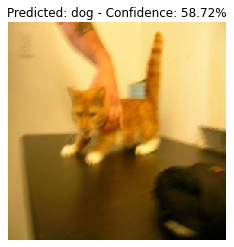

1/1 [==============================] - 0s 63ms/step


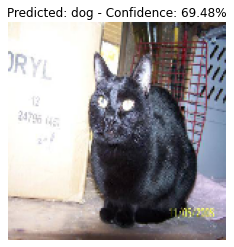

1/1 [==============================] - 0s 74ms/step


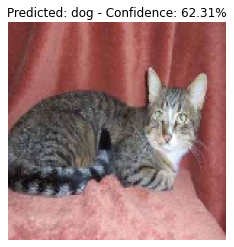

1/1 [==============================] - 0s 63ms/step


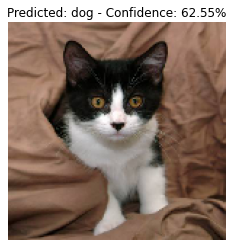

1/1 [==============================] - 0s 74ms/step


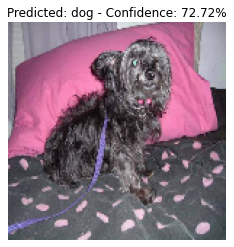

1/1 [==============================] - 0s 70ms/step


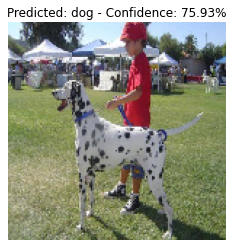

1/1 [==============================] - 0s 69ms/step


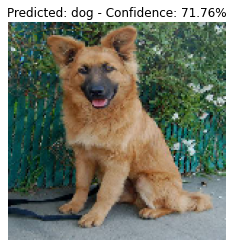

1/1 [==============================] - 0s 71ms/step


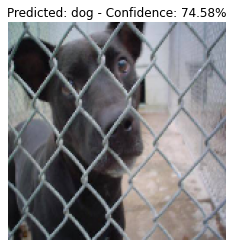

1/1 [==============================] - 0s 77ms/step


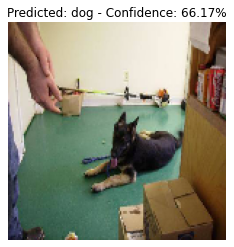

In [2]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import tensorflow as tf

# Step 1: Preprocess the data (as previously done)
train_dir = r'C:\Users\91983\OneDrive\Documents\archive\cats_and_dogs_filtered\train'
validation_dir = r'C:\Users\91983\OneDrive\Documents\archive\cats_and_dogs_filtered\validation'
test_dir = r'C:\Users\91983\OneDrive\Documents\archive\cats_and_dogs_filtered\test'

# Function to predict and label images in the test folder
def predict_and_label_images(test_dir, model):
    class_names = ['cat', 'dog']  # Define the class labels (based on directory structure)

    # Loop through all images in the test directory
    for folder_name in os.listdir(test_dir):  # Get folder names (cat, dog)
        folder_path = os.path.join(test_dir, folder_name)
        
        if os.path.isdir(folder_path):  # Ensure it's a folder (cat or dog folder)
            for img_name in os.listdir(folder_path):  # Loop through images in the folder
                img_path = os.path.join(folder_path, img_name)
                
                # Load and preprocess the image
                img = image.load_img(img_path, target_size=(150, 150))  # Resize to 150x150
                img_array = image.img_to_array(img)  # Convert image to array
                img_array = tf.expand_dims(img_array, axis=0)  # Add batch dimension
                img_array = img_array / 255.0  # Normalize the image

                # Get prediction from the model
                prediction = model.predict(img_array)
                predicted_class = tf.argmax(prediction, axis=1).numpy()[0]  # Get predicted class (0 for cat, 1 for dog)
                confidence = prediction[0][predicted_class]  # Get the confidence of the prediction

                # Display the image with prediction label and confidence
                plt.imshow(img)
                plt.title(f"Predicted: {class_names[predicted_class]} - Confidence: {confidence*100:.2f}%")
                plt.axis('off')  # Turn off axis
                plt.show()

# Call the function to predict and label images in the test folder
predict_and_label_images(test_dir, model)
